# Analysing house features through Linear Regression

## Tasks

1. City wise plotting of mean of features such as rent amount, rooms, area, floor, etc.
2. Trying to find a dependence of House Association Tax, property tax and fire insurance on other features.
3. Finding the dependence of rent amount on other features through Linear Regression.

## Analysing the data

In [1]:
import pandas as pd
# reading data file
data = pd.read_csv("/home/khyathi/Desktop/ML@Kaggle/Jupyter/House Prediction/House_prediction.csv")
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [2]:
# setting city column as index
data.set_index('city', inplace=True)

In [3]:
# changing floor data type from string to int
filt = (data['floor'] == '-')
data.loc[filt, 'floor'] = 0
def to_int(str):
    return int(str)
data['floor'] = data['floor'].apply(to_int)

In [4]:
import numpy as np
# finding cities from data
cities = np.unique(data.index)
cities

array(['Belo Horizonte', 'Campinas', 'Porto Alegre', 'Rio de Janeiro',
       'São Paulo'], dtype=object)

In [5]:
# finding city-wise averages
avg_rent_amount = [np.mean(data.loc[city]['rent amount (R$)']) for city in cities]
avg_rooms = [np.mean(data.loc[city]['rooms']) for city in cities]
avg_area = [np.mean(data.loc[city]['area']) for city in cities]
avg_floor = [np.mean(data.loc[city]['floor']) for city in cities]
avg_bathrooms = [np.mean(data.loc[city]['bathroom']) for city in cities]
avg_parking_spaces = [np.mean(data.loc[city]['parking spaces']) for city in cities]

## 1.  Plots of city-wise averages

In [6]:
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.tight_layout()

<Figure size 576x396 with 0 Axes>

<BarContainer object of 5 artists>

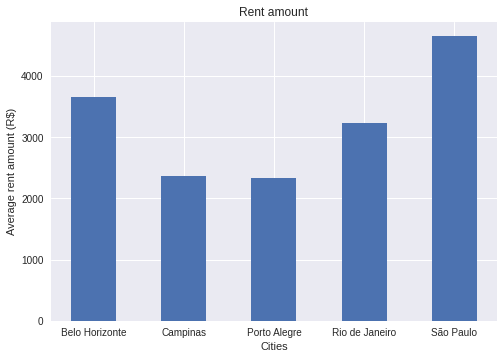

In [7]:
# plot of average rent amount
plt.title('Rent amount')
plt.xlabel('Cities')
plt.ylabel('Average rent amount (R$)')
plt.bar(cities, avg_rent_amount, width=0.5)

<BarContainer object of 5 artists>

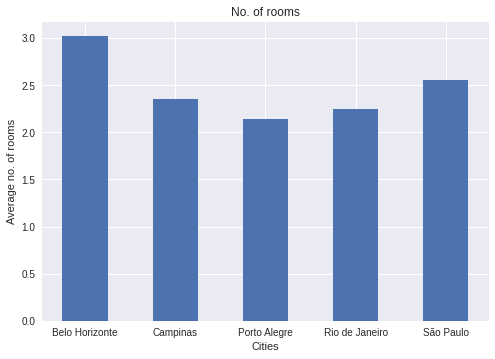

In [8]:
# plot of average no. of rooms
plt.title('No. of rooms')
plt.xlabel('Cities')
plt.ylabel('Average no. of rooms')
plt.bar(cities, avg_rooms, width=0.5)

<BarContainer object of 5 artists>

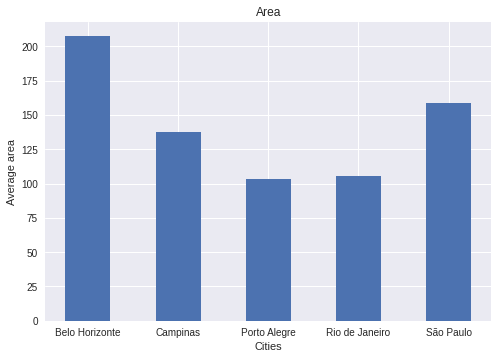

In [9]:
# plot of average area
plt.title('Area')
plt.xlabel('Cities')
plt.ylabel('Average area')
plt.bar(cities, avg_area, width=0.5)

<BarContainer object of 5 artists>

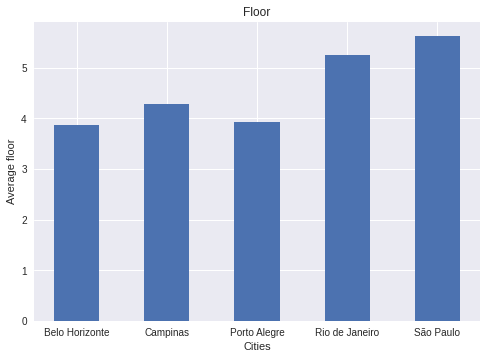

In [10]:
# plot of average floor
plt.title('Floor')
plt.xlabel('Cities')
plt.ylabel('Average floor')
plt.bar(cities, avg_floor, width=0.5)

<BarContainer object of 5 artists>

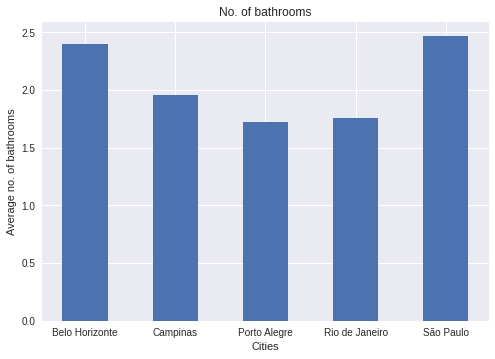

In [11]:
# plot of average no. of bathrooms
plt.title('No. of bathrooms')
plt.xlabel('Cities')
plt.ylabel('Average no. of bathrooms')
plt.bar(cities, avg_bathrooms, width=0.5)

<BarContainer object of 5 artists>

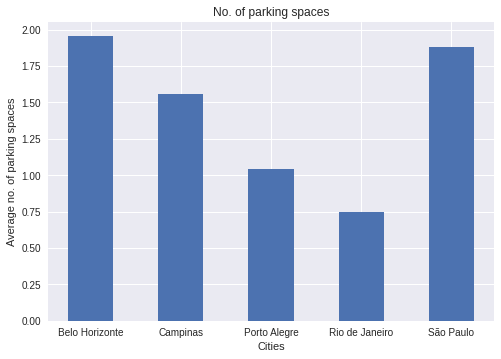

In [12]:
# plot of average no. of parking spaces
plt.title('No. of parking spaces')
plt.xlabel('Cities')
plt.ylabel('Average no. of parking spaces')
plt.bar(cities, avg_parking_spaces, width=0.5)

## 2. Dependance of taxes/insurance on other features

<AxesSubplot:>

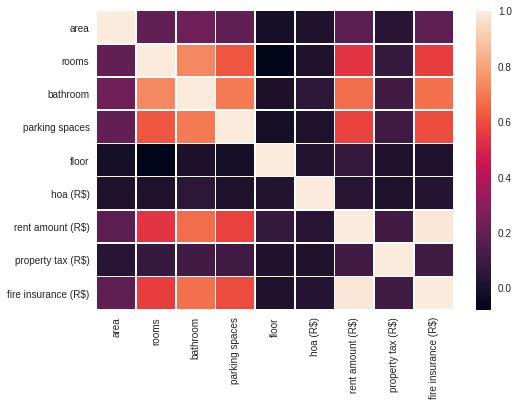

In [13]:
import seaborn as sns
# using correlation heatmap to find the dependances
sns.heatmap(data.iloc[:, :-1].corr(), linewidths=.5)

According to the above heatmap, the rent amount and the fire insurance depend significantly on the no. of rooms, bathrooms and parking spaces. 

## 3. Dependence of rent amount on other features through Linear Regression

In [14]:
# resetting indexes
data.reset_index(inplace=True)
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [15]:
from sklearn.preprocessing import LabelEncoder
# label encoding categorical columns
labelencoder = LabelEncoder()
data.city = labelencoder.fit_transform(data.city)
data.animal = labelencoder.fit_transform(data.animal)
data.furniture = labelencoder.fit_transform(data.furniture)

In [16]:
# setting independent and dependent variables
# using all columns except rent amount and total for X
X = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11]].values
y = data['rent amount (R$)'].values

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# one-hot encoding categorical columns
columntransformer = ColumnTransformer([('onehotencoder', OneHotEncoder(drop='first'), [0, 6, 7])], remainder='passthrough')
X = columntransformer.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 692/10692, random_state = 0)

In [19]:
from sklearn.linear_model import LinearRegression
# fitting data into linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
# predicting values for testing set
y_pred = regressor.predict(X_test)

In [21]:
# showing actual values and predicted values
pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

,Actual,Predicted
0,1650,1752.236227
1,3500,3503.811981
2,4000,4331.578202
3,5010,4781.316328
4,5000,4744.538923
...,...,...
687,6170,5995.287506
688,1100,895.030722
689,3250,2867.837032
690,2500,2865.533061


In [22]:
# showing the intercept of Linear Regression
regressor.intercept_

-53.83234114844254

In [23]:
# showing the coefficients of Linear Regression
regressor.coef_

array([ 1.76190182e+02, -1.53546023e+02,  2.61416861e+02,  2.90281689e+02,
        2.89873659e+01, -1.25569796e+02, -2.46884812e-02, -3.41402608e+01,
        4.76708923e+01, -3.62681081e+01,  2.85063832e+01,  1.16391915e-03,
        2.21909981e-03,  7.01768179e+01])

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score
# showing mean absolute error
mean_absolute_error(y_test, y_pred)

301.52656026486744

In [25]:
# showing coefficient of determination
r2_score(y_test, y_pred)

0.982487597186537

Thus, we built a model through Linear Regression for the given data with a Mean Absolute Error (MAE) of R$301.53 and a Coefficient of Determination (R2) of 0.98. 